In [1]:
import numpy as np
from scipy.stats import norm, anderson
import pandas as pd
np.set_printoptions(precision=2)
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [25]:
price_table = pd.read_csv('spy_complete_adj.csv',parse_dates=[0])

price_table=price_table.reindex(index=price_table.index[::-1])
price_table.index = price_table.index[::-1]
print(price_table)

           Date     AdjOpen    AdjClose     AdjHigh      AdjLow
0    1993-01-29   28.032038   28.000838   28.032038   27.813338
1    1993-01-02   27.918690   28.199990   28.199990   27.918690
2    1993-02-02   28.134704   28.259704   28.291004   28.041004
3    1993-03-02   28.152165   28.558465   28.589665   28.120965
4    1993-04-02   28.646656   28.677956   28.771656   28.146656
5    1993-05-02   28.658009   28.658009   28.751809   28.408009
6    1993-08-02   28.658009   28.658009   28.814309   28.595509
7    1993-09-02   28.615157   28.458857   28.615157   28.365157
8    1993-10-02   28.436187   28.498687   28.529987   28.311187
9    1993-11-02   28.481826   28.638126   28.825626   28.481826
10   1993-12-02   28.700326   28.419026   28.700326   28.419026
11   1993-02-16   28.702077   27.702077   28.702077   27.639577
12   1993-02-17   27.713394   27.682194   27.775894   27.525894
13   1993-02-18   28.193547   27.662247   28.193547   27.068547
14   1993-02-19   27.605555   27.761855 

In [76]:
returns = {'date_open':[],'date_close':[],'duration':[],'return_day':[],'return_duration':[]}
trade_duration = 28
for i in price_table.index[0:-1]:
    if i==0:
        pivot_date = price_table.Date[i]
        pivot_price = price_table.AdjClose[i]
        continue
    
    duration = (price_table.Date[i+1] - price_table.Date[i]).total_seconds()/60/60/24
    if duration >= trade_duration:
        returns['date_open'].append(pivot_date)
        returns['date_close'].append(price_table)
        returns['duration'].append(duration)
        returns['return_duration'].append(np.log(price_table.AdjClose[i] / pivot_price))
        returns['return_day'].append(np.log(price_table.AdjClose[i] / pivot_price) / duration)
        pivot_date = price_table.Date[i]
        pivot_price = price_table.AdjClose[i]

RETURNS:
Mean:     0.0010
Mean_y:   0.0129

Std:      0.0169
Std_y:    0.0611


<IPython.core.display.Javascript object>


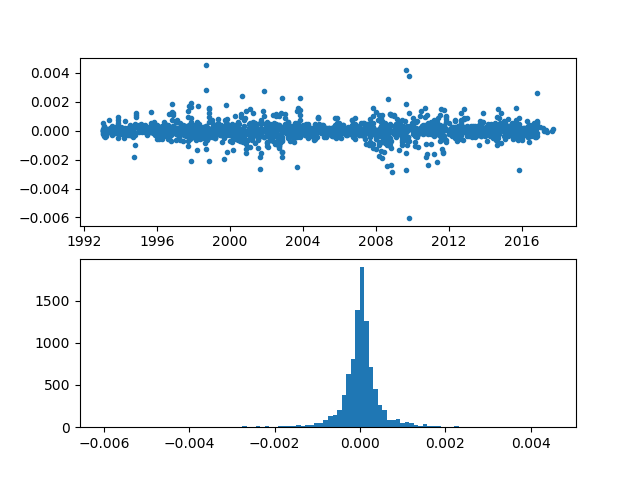

In [77]:
print('RETURNS:')
print('Mean:     {:.4f}'.format(np.mean(returns['return_duration'])))
print('Mean_y:   {:.4f}'.format(np.exp(np.mean(returns['return_duration'])*(365/trade_duration))-1))
print()
print('Std:      {:.4f}'.format(np.std(returns['return_duration'])))
print('Std_y:    {:.4f}'.format(np.std(returns['return_duration'])/np.sqrt(1/(365/trade_duration))))
plt.figure()
plt.subplot(2,1,1)
plt.plot(returns['date_open'],returns['return_day'],marker='.',ls='')
plt.subplot(2,1,2)
plt.hist(returns['return_day'],100,normed=True);

<IPython.core.display.Javascript object>


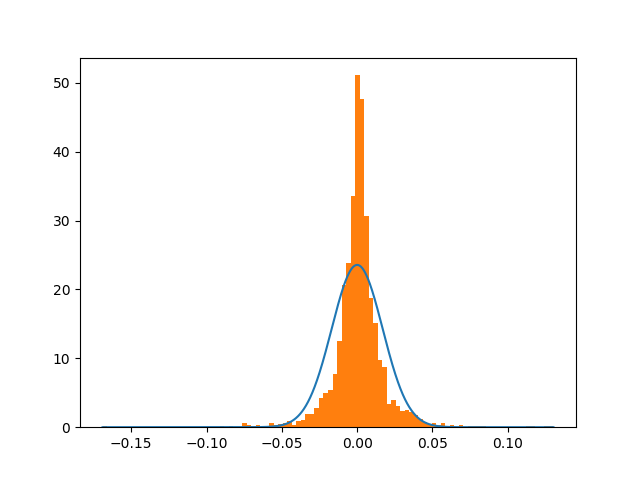

In [84]:
x = np.arange(np.min(returns['return_duration']),np.max(returns['return_duration']), 0.0001)
y_normal = norm.pdf(x, loc=0, scale=np.std(returns['return_duration']))
plt.figure()
plt.plot(x,y_normal)
plt.hist(returns['return_duration'],100,normed=True);


In [81]:
anderson(returns['return_duration'],dist='norm')

AndersonResult(statistic=69.287886653381975, critical_values=array([ 0.57,  0.66,  0.79,  0.92,  1.09]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))